In [149]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv('/Users/kirant/PythonProjects/NLP-Repo/sentiment_analysis/data/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


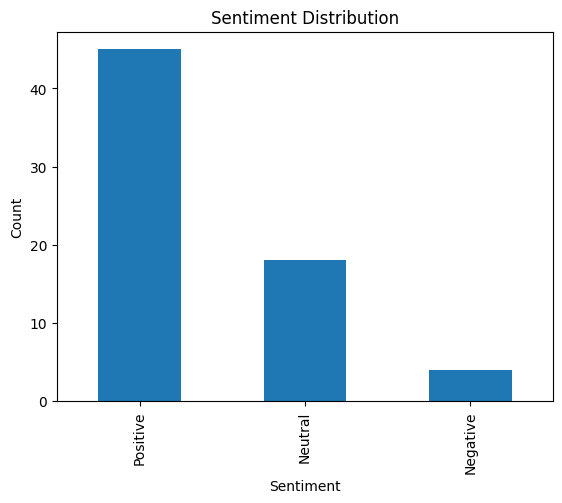

Missing values in each column:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
Number of duplicate rows: 0
Data types of the columns:
Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object
Unique values in 'Sentiment': ['Positive', 'Negative', 'Neutral']
Categories (3, object): ['Negative', 'Neutral', 'Positive']
First few rows of the cleaned DataFrame:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1 

In [151]:
df['Sentiment']= df['Sentiment'].str.strip()
df = df[(df.Sentiment == 'Positive') | (df.Sentiment == 'Negative') | (df.Sentiment == 'Neutral')]
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicates
df = df.drop_duplicates()
# Reset index after dropping duplicates
df.reset_index(drop=True, inplace=True)
# Check the data types of the columns
print("Data types of the columns:")
print(df.dtypes)
# Convert 'Sentiment' to categorical type
df['Sentiment'] = df['Sentiment'].astype('category')
# Check the unique values in 'Sentiment'
print("Unique values in 'Sentiment':", df['Sentiment'].unique())
# Display the first few rows of the cleaned DataFrame
print("First few rows of the cleaned DataFrame:")
print(df.head())

In [152]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)

In [153]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [155]:
df.dtypes

Id              int64
Text           object
Sentiment    category
Timestamp      object
User           object
Platform       object
Hashtags       object
Retweets      float64
Likes         float64
Country        object
Year            int64
Month           int64
Day             int64
Hour            int64
dtype: object

In [156]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [ ]:
df['Text']= df['Text'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [158]:
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


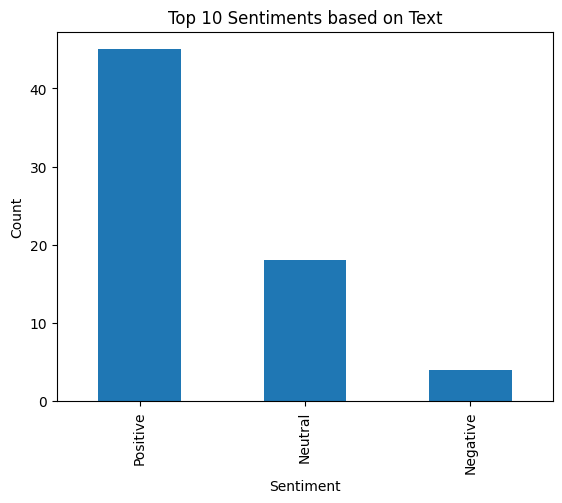

In [159]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [160]:
df['Platform'].value_counts()

Platform
Instagram    23
Twitter      22
Facebook     22
Name: count, dtype: int64

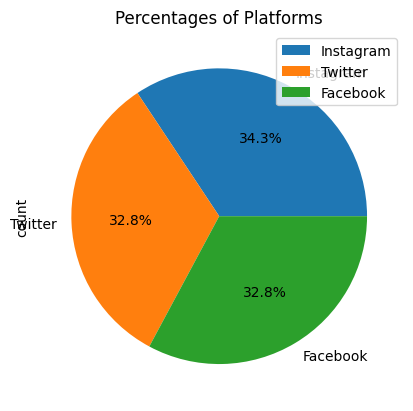

In [161]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

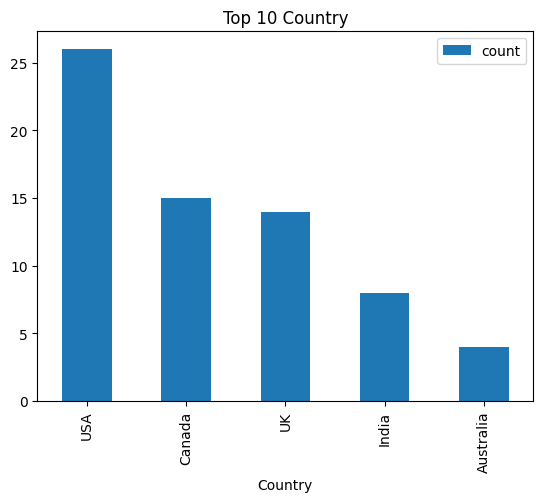

In [162]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

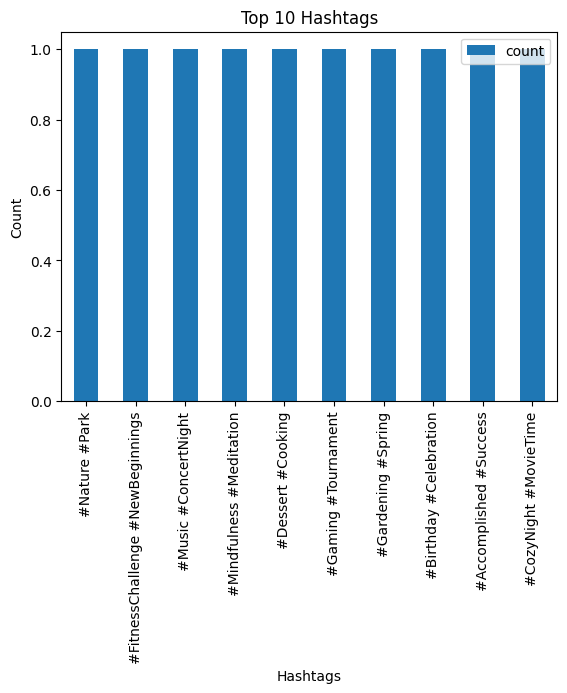

In [163]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

In [164]:
# Numerical data statistics
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,67.00000,67,67.000000,67.000000,67.0,67.000000,67.000000,67.000000
mean,179.80597,2023-03-21 10:46:47.462686464,18.940299,37.746269,2023.0,3.014925,18.701493,14.313433
min,0.00000,2023-01-15 08:45:00,5.000000,10.000000,2023.0,1.000000,1.000000,0.000000
25%,16.50000,2023-01-19 20:37:30,15.000000,30.000000,2023.0,1.000000,15.000000,12.000000
50%,35.00000,2023-01-26 09:45:00,19.000000,37.000000,2023.0,1.000000,19.000000,15.000000
75%,51.50000,2023-02-01 01:30:00,22.500000,45.000000,2023.0,1.500000,25.500000,17.000000
max,722.00000,2023-10-15 20:45:00,30.000000,60.000000,2023.0,10.000000,31.000000,22.000000
std,288.04478,NaN,5.928566,11.692193,0.0,3.719289,8.259090,4.004577


In [165]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 10
Minimum Year: 2023 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 60.0
Minimum Retweets: 5.0 | Maximum Retweets: 30.0


# Relationships between columns

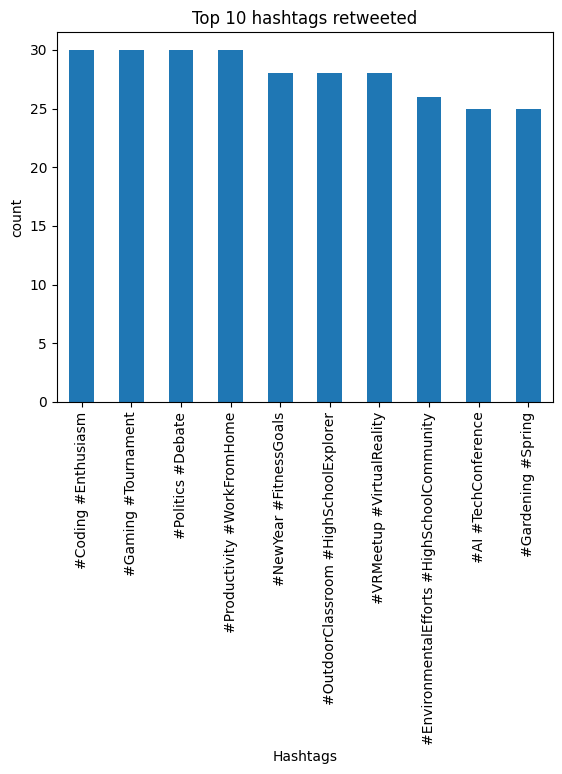

In [166]:
## Top 10 retweeted hashtags

H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

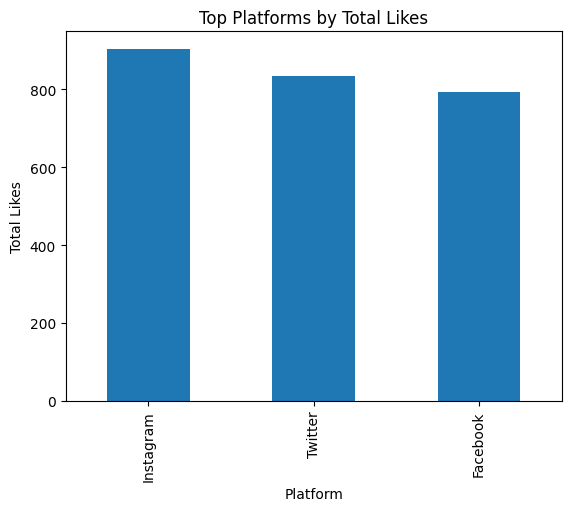

In [167]:
# What's the favourite platform among the users

top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

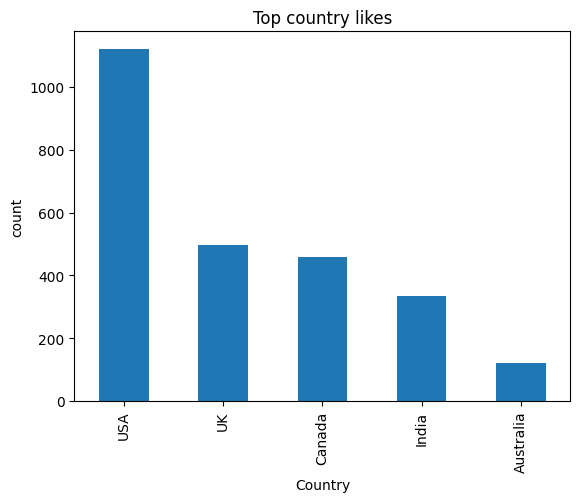

In [168]:
# countries with most likes
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

#### segmenting users based on platform

In [169]:
facebook=df[df['Platform']=='Facebook']
twitter=df[df['Platform']=='Twitter']
instagram=df[df['Platform']=='Instagram']

# Facebook Analysis

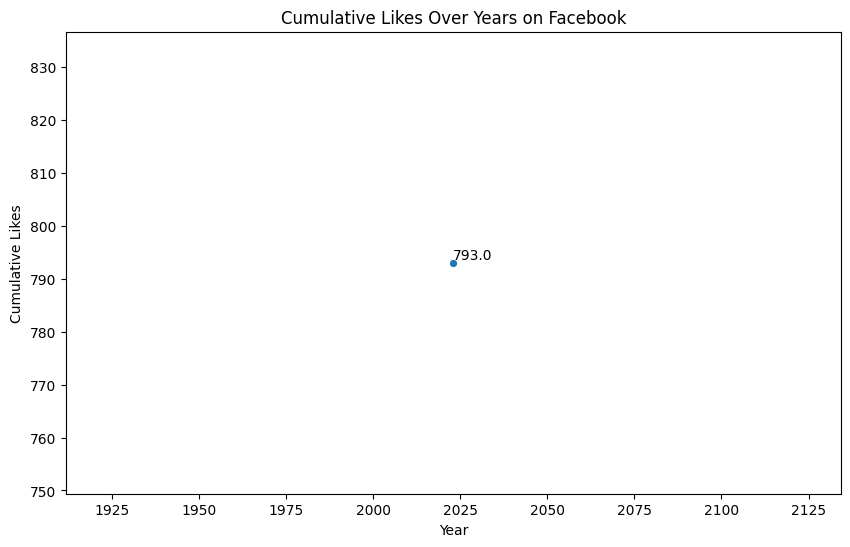

In [170]:
f = facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

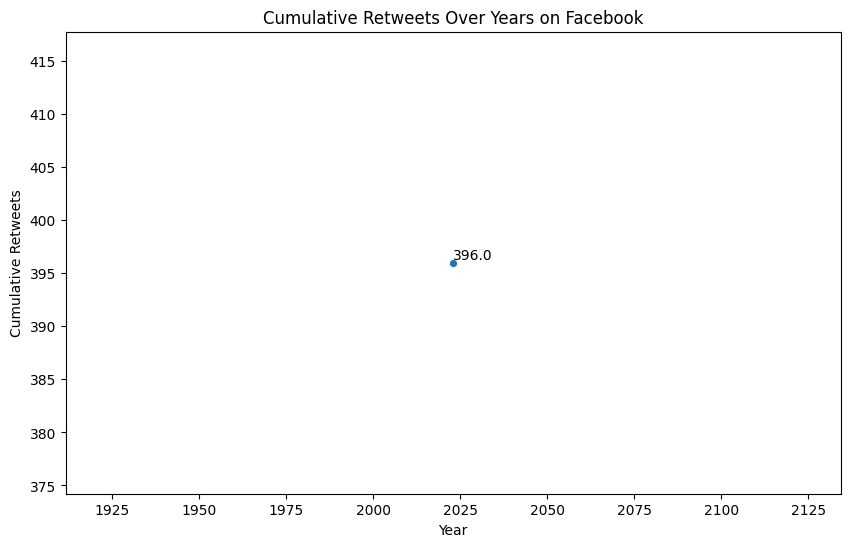

In [171]:
f = facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# Twitter Analysis

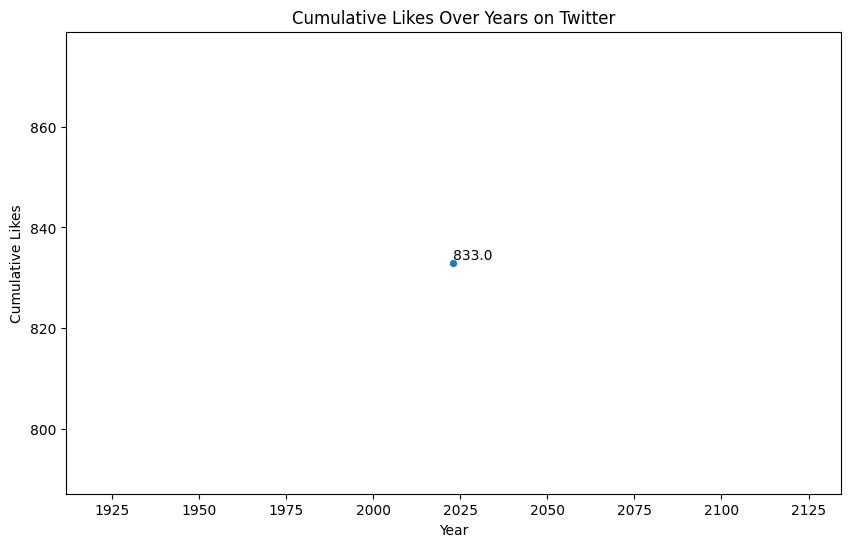

In [172]:
f = twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

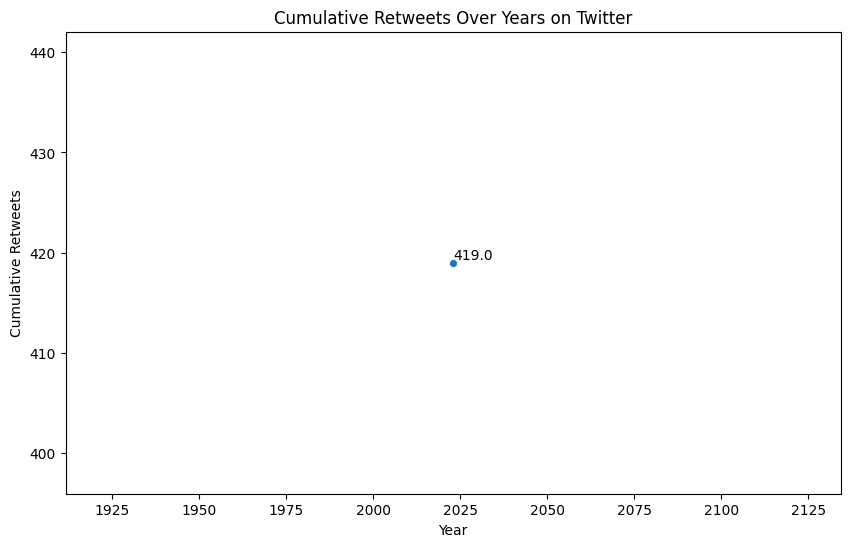

In [173]:
f = twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

## pre process

In [174]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package punkt to /Users/kirant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kirant/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
df = df[['Text','Sentiment']].copy()
df.head()


,Text,Sentiment
0,Enjoying a beautiful day at the park!,Positive
1,Traffic was terrible this morning.,Negative
2,Just finished an amazing workout! 💪,Positive
3,Excited about the upcoming weekend getaway!,Positive
4,Trying out a new recipe for dinner tonight.,Neutral


In [176]:
df['clean_txt'] = df['Text'].apply(lambda text: text.lower().strip())
df['clean_txt'] = df['clean_txt'].apply(lambda text: re.sub(r' +', ' ', text))
df['clean_txt'] = df['clean_txt'].apply(lambda text: re.sub(r'[^\w\s]', '', text))
df['clean_txt'] = df['clean_txt'].apply(lambda text: ' '.join(stemmer.stem(text) for word in text.split() if word not in stop_words))
df['clean_txt'] = df['clean_txt'].astype(str)
df['tokenized_text'] = df['clean_txt'].apply(word_tokenize)
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in string.punctuation])
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))
df = df[['Sentiment', 'tokenized_text']].copy()
df.head()

,Sentiment,tokenized_text
0,Positive,enjoy beauti day park enjoy beauti day park en...
1,Negative,traffic terribl morn traffic terribl morn traf...
2,Positive,finish amaz workout finish amaz workout finish...
3,Positive,excit upcom weekend getaway excit upcom weeken...
4,Neutral,tri new recip dinner tonight tri new recip din...


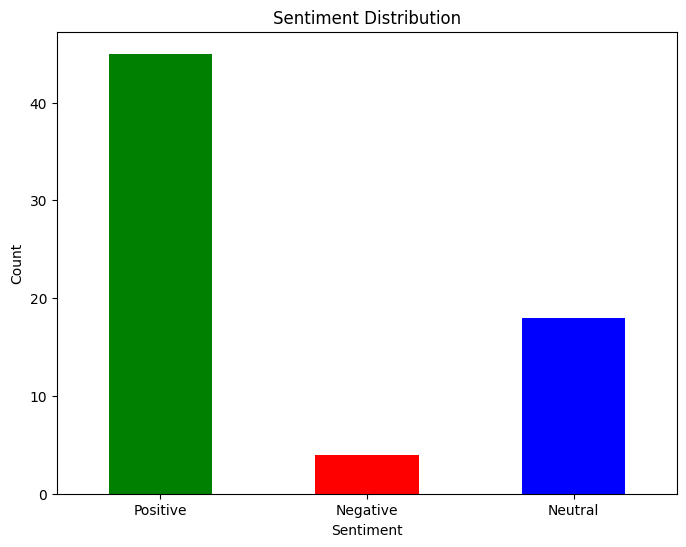

In [177]:
sentiments = ['Positive', 'Negative', 'Neutral']
total_data = df.groupby('Sentiment').size().reindex(sentiments, fill_value=0)
plt.figure(figsize=(8, 6)) 
total_data.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show() 


In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [179]:
X = df['tokenized_text'].values
y = df['Sentiment'].values

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [181]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [182]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [183]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [184]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

     Neutral       1.00      0.20      0.33         5
    Positive       0.69      1.00      0.82         9

    accuracy                           0.71        14
   macro avg       0.85      0.60      0.58        14
weighted avg       0.80      0.71      0.65        14

